In [31]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr   
from IPython.display import Audio
import scipy.io.wavfile
import matplotlib.pyplot as plt
import wave
import os
import collections
%matplotlib inline

In [57]:
# 6.1 (a)
s1 = pd.read_csv('sounds/sound1.dat', header=None).as_matrix()
s2 = pd.read_csv('sounds/sound2.dat', header=None).as_matrix()
s = np.concatenate([s1,s2],axis=1).T

# 6.1 (b)
A = np.random.RandomState(12).rand(2,2)
np.linalg.inv(A) # proof that it's invertible
x0 = np.dot(A,s)

# 6.1 (c)
x = x0[:,np.random.RandomState(444).permutation(x0.shape[1])]

# 6.1 (d)
p1,_ = pearsonr(s[0,:],x[0,:])
p2,_ = pearsonr(s[0,:],x[1,:])
p3,_ = pearsonr(s[1,:],x[0,:])
p4,_ = pearsonr(s[1,:],x[1,:])

# 6.1 (e)
x -= x.mean(axis=1).reshape((2, 1))

# 6.1 (f)
w0 = np.random.RandomState(444).rand(2,2)

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def delta_sigmoid(x):
    return np.exp(x) / (1 + np.exp(x)) ** 2

def psi(x):
    return 1 - 2 * sigmoid(x)

def cost(x, w):
    wx = np.dot(w, x)
    return np.log(np.abs(w)) + np.log(delta_sigmoid(wx)).mean()

def delta_cost_regular(x, w):
    y = np.dot(w, x)
    return np.linalg.inv(w.T) + psi(y).dot(x.T)

def delta_cost_regular(x, w):
    y = np.dot(w, x)
    return np.linalg.inv(w.T) + psi(y).dot(x.T)

def delta_cost_natural(x, w):
    y = np.dot(w, x)
    delta_W = np.dot(psi(y).T.dot(np.dot(w, x).T), w)
    delta_W = delta_W + w # multiplied out delta function
    delta_W[0,0] = 0 # Bell-Seijnowski solution
    delta_W[1,1] = 0 # Bell-Seijnowski solution
    return delta_W

def ica_online(initial_eta, w0, x0, x, delta_function):
    avg_cost = collections.deque()
    w = w0[:]
    for time, example in enumerate(x.T):
        eta = initial_eta / (time + 1)
        w += eta * delta_function(example, w)
        avg_cost.append(cost(x, w).mean())
    unmixed = w.dot(x0)
    return unmixed, avg_cost, w

In [75]:
# 6.2 (a), (b), (c)
initial_eta = 0.01  # learning rate
unmixed_reg, avg_cost_reg, w_reg = ica_online(initial_eta, w0, x0, x,
                                              delta_cost_regular)
unmixed_nat, avg_cost_nat, w_nat = ica_online(initial_eta, w0, x0, x,
                                              delta_cost_natural)


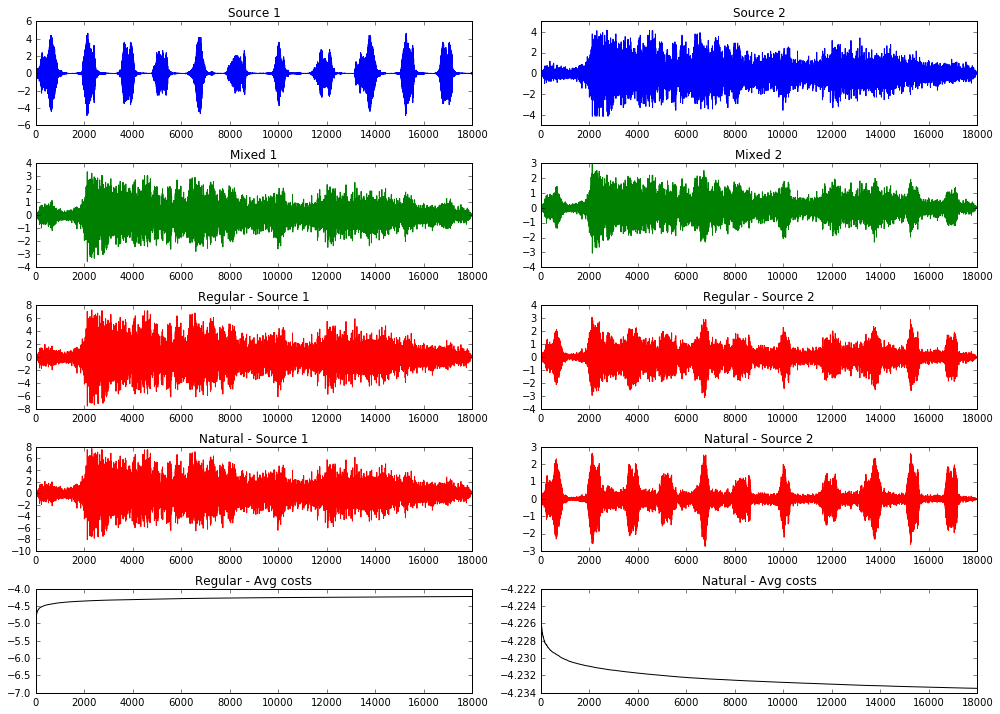

In [76]:
def playAndPlot(sound, ax, dontSave=False, **kwargs):
    ax.plot(sound, **kwargs)
    # ax.set_ylim(-15,15)
    filename = 'temp.wav'
    if 'label' in kwargs:
        ax.set_title(kwargs['label'])
        filename = kwargs['label'] + '.wav'
    if not dontSave:
        scipy.io.wavfile.write(filename, 8192, sound)

# original sources
fig, ax = plt.subplots(5,2, figsize=(14, 10))

playAndPlot(s1,ax[0,0], color='blue', label='Source 1')
playAndPlot(s2,ax[0,1], color='blue', label='Source 2')
playAndPlot(x0[0,:],ax[1,0], color='green', label='Mixed 1')
playAndPlot(x0[1,:],ax[1,1], color='green', label='Mixed 2')
playAndPlot(u_reg[0,:],ax[2,0], color='red', label='Regular - Source 1')
playAndPlot(u_reg[1,:],ax[2,1], color='red', label='Regular - Source 2')
playAndPlot(u_nat[0,:],ax[3,0], color='red', label='Natural - Source 1')
playAndPlot(u_nat[1,:],ax[3,1], color='red', label='Natural - Source 2')
playAndPlot(np.array(avg_cost_reg), ax[4,0], color='black', label='Regular - Avg costs', dontSave=True)
playAndPlot(np.array(avg_cost_nat), ax[4,1], color='black', label='Natural - Avg costs', dontSave=True)

fig.tight_layout()


In [70]:
print(avg_cost_nat.shape)

(2, 2)
